Mens question count: 2320
Womens question count: 2320
2607159.5
0.03273963320986578
The p-value of 0.03273963320986578 is statistically significant at p < .05.
[273.62372246850185, 283.5894339299097]


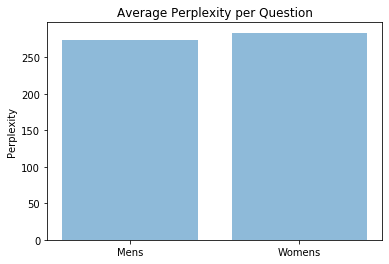

In [9]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize
import time
import math
import kenlm
import scipy

stop_words = set(stopwords.words('english'))

count = 8
mensQuestionCount = 0
womensQuestionCount = 0
mensWords = []
womensWords = []
mensQuestions = []
womensQuestions = []

#mens words 
for i in range(count):
    f = open("/home/lbali/Documents/Python/Basketball/womensVsMens/mens/interview" + str(i) + ".txt", "r")
    questionsWithStopWords = []
    for line in f:
        if(line[0] == "Q"):
            questionsWithStopWords.append(line)
            mensQuestions.append(line)
            mensQuestionCount = mensQuestionCount + 1
    for question in questionsWithStopWords:
        word_tokens = word_tokenize(question)
        for w in word_tokens:
            if w not in stop_words and w!="Q" and w!= "Q." and w!="'" and w!="," and w!="." and w!="?" and w!="'s" and w!="'ve" and w!="n't":
                mensWords.append(w)


mensWords.sort()
mensWordCount = {}
lastWord = mensWords[0]
count = 1

for word in mensWords:
    if lastWord == word:
        count = count+1
    else:
        mensWordCount.update( {lastWord : count} )
        count = 1
    lastWord = word

        
#for word, wordCount in mensWordCount.items():
#    if wordCount > 15:
#        print(word + " was used " + str(wordCount) + " times")


print("Mens question count: " + str(mensQuestionCount))

#womens words
count = 17

for i in range(count):
    f = open("/home/lbali/Documents/Python/Basketball/womensVsMens/womens/interview" + str(i) + ".txt", "r")
    questionsWithStopWords = []
    for line in f:
        if(line[0] == "Q"):
            questionsWithStopWords.append(line)
            line.split('?')
            womensQuestions.append(line)
            womensQuestionCount = womensQuestionCount + 1
    for question in questionsWithStopWords:
        word_tokens = word_tokenize(question)
        for w in word_tokens:
            if w not in stop_words  and w!= "'re" and w!= "--" and w!="Q" and w!= "Q." and w!="'" and w!="," and w!="." and w!="?" and w!="'s" and w!="'ve" and w!="n't":
                womensWords.append(w)


womensWords.sort()
womensWordCount = {}
lastWord = womensWords[0]
count = 1

for word in womensWords:
    if lastWord == word:
        count = count+1
    else:
        womensWordCount.update( {lastWord : count} )
        count = 1
    lastWord = word

        
#for word, wordCount in womensWordCount.items():
#    if wordCount > 15:
#        print(word + " was used " + str(wordCount) + " times")


print("Womens question count: " + str(womensQuestionCount))

#differences in word usage
#wordDifferences = {}
#for word, wordCount in womensWordCount.items():
#    for word2, wordCount2 in mensWordCount.items():
#        if word == word2:
#            wordDifferences.update({word:wordCount - wordCount2})

#for word, wordCount in wordDifferences.items():
#    if abs(wordCount) > 60:
#        if(wordCount > 0):
#            print(word + " was used " + str(wordCount) + " more times in womens questions than mens. ")
#for word, wordCount in wordDifferences.items():
#    if abs(wordCount) > 60:
#        if(wordCount < 0):
#            print(word + " was used " + str(abs(wordCount)) + " more times in mens questions than womens. ")       

#print(mensQuestions)
#print(womensQuestions)

totalPerplexity = 0
count = 0
mensPerplexities = []
womensPerplexities = []
model = kenlm.LanguageModel('/home/lbali/Documents/Python/Basketball/womensVsMens/yourLM.klm')

for question in womensQuestions:
    totalPerplexity = totalPerplexity + model.perplexity(question)
    count = count + 1
    #if model.perplexity(question) > 700:
    #    print(str(model.perplexity(question)) + ": " + question)
    womensPerplexities.append(model.perplexity(question))

womensPerplexity = (totalPerplexity/count)

totalPerplexity = 0
count = 0

for question in mensQuestions:
    totalPerplexity = totalPerplexity + model.perplexity(question)
    count = count + 1
    #if model.perplexity(question) > 700:
     #   print(str(model.perplexity(question)) + ": " + question)
    mensPerplexities.append(model.perplexity(question))


mensPerplexity = (totalPerplexity/count)
statistic, pvalue = scipy.stats.mannwhitneyu(womensPerplexities, mensPerplexities)
print(statistic)
print(pvalue)
if pvalue < 0.05:
    print("The p-value of " + str(pvalue) + " is statistically significant at p < .05.")
sexes = ("Mens" , "Womens")
y_pos = np.arange(len(sexes))
perplexities = [mensPerplexity, womensPerplexity]
print(perplexities)
plt.bar(y_pos, perplexities, align = 'center', alpha = 0.5)
plt.xticks(y_pos, sexes)
plt.ylabel('Perplexity')
plt.title('Average Perplexity per Question')

plt.show()
